In [27]:
import  torch
x = torch.arange(4.0)
x

tensor([0., 1., 2., 3.])

In [28]:
x.requires_grad_(True)

tensor([0., 1., 2., 3.], requires_grad=True)

In [29]:
y = 2 * torch.dot(x,x)
y

tensor(28., grad_fn=<MulBackward0>)

In [30]:
y.backward()
x.grad

tensor([ 0.,  4.,  8., 12.])

In [31]:
x.grad == 4 * x

tensor([True, True, True, True])

In [37]:
# 将x的梯度归零
x.grad.zero_()

tensor([0., 0., 0., 0.])

pytorch只能对标量求导，若所需求导的为向量，需将其转化为标量:
$$
X = [x_0,x_1] Z=X+2=[x_0+2,x_1 +2] \\
Z_{sum} = x_0 + x_1 +4
$$
显然$Z_{sum}$与$Z$求梯度结果一致

In [38]:
y = 4 * x
y.backward(torch.ones(len(x)))
x.grad

tensor([4., 4., 4., 4.])

In [25]:
x.grad.zero_()
y = x * x

In [26]:
y.sum().backward()
x.grad

tensor([0., 2., 4., 6.])

In [41]:
x.grad.zero_()
y = x * x
u = y.detach()
z = u * x
z.sum().backward()
x.grad == u

tensor([True, True, True, True])

In [42]:
x.grad.zero_()
y.sum().backward()
x.grad == 2 * x

tensor([True, True, True, True])

In [51]:
def f(a: torch.tensor):
    b: torch.tensor = a * 2
    while b.norm() < 1000:
        b = b * 2
    if b.sum() > 0:
        c = b
    else:
        c = 100 * b
    return c

In [56]:
a = torch.randn(size=(),requires_grad=True)
d = f(a)
d.backward()

tensor(2.1088, grad_fn=<LinalgVectorNormBackward0>)


In [58]:
d / a

tensor(102400., grad_fn=<DivBackward0>)

In [57]:
a.grad == d / a

tensor(True)

In [ ]:
x.zero_()


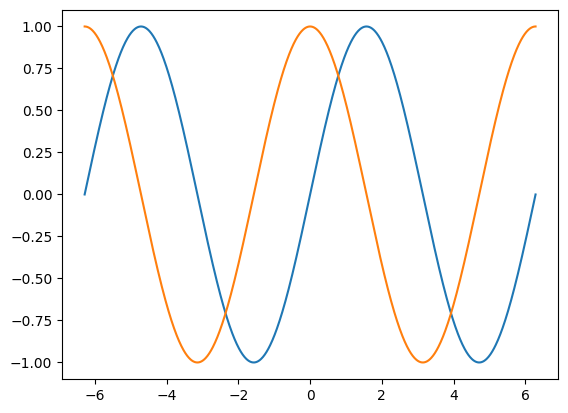

In [81]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
_x = np.linspace(-2 * np.pi,2*np.pi,1000)
x = torch.tensor(_x,dtype=torch.float32,requires_grad=True)
y = torch.sin(x)
y.sum().backward(create_graph=True)
y_1 = x.grad
plt.plot(x.detach(),y.detach())
plt.plot(x.detach(),y_1.detach())